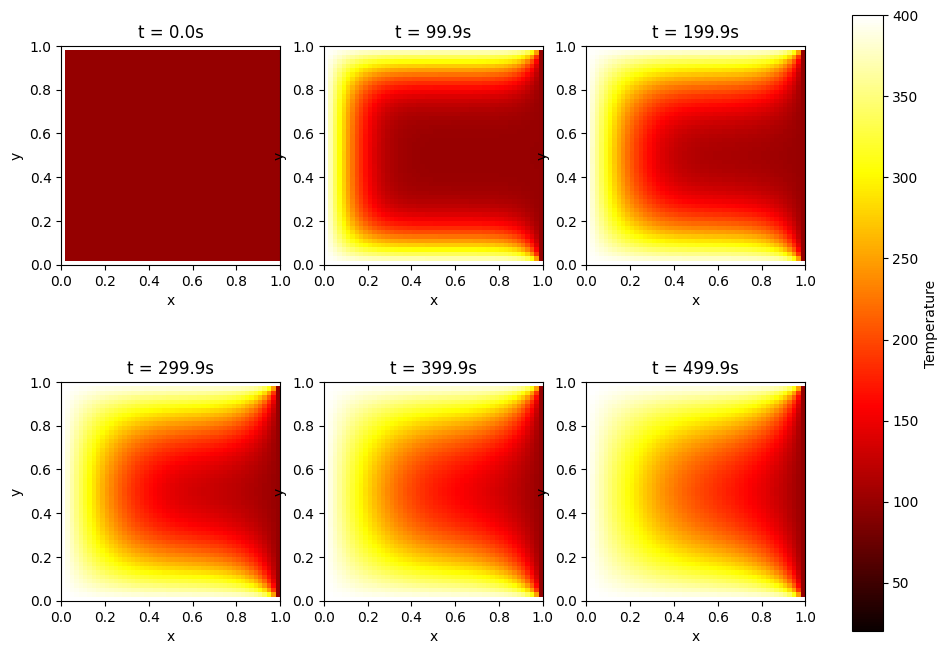

In [1]:
#Without Parallelization  

import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 1.11e-4  # thermal diffusivity

# Grid setup
nx, ny = 50, 50
nt = 5000        # number of time steps
Lx, Ly = 1.0, 1.0
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
dx = x[1] - x[0]
dy = y[1] - y[0]
dt = 0.1

# Stability check (simplified for square grid)
assert alpha * dt * (1/dx**2 + 1/dy**2) < 0.5, "Stability condition violated!"

# Initialize temperature array: T[y, x]
T = np.zeros((ny, nx, nt))

# Initial condition
T[:, :, 0] = 100

# Boundary conditions (Dirichlet)
T[:, 0, :] = 400      # Left
T[:, -1, :] = 100    # Right
T[-1, :, :] = 400      # Top
T[0, :, :] = 400       # Bottom

# Time-stepping loop
for k in range(nt - 1):
    for i in range(1, ny - 1):
        for j in range(1, nx - 1):
            T[i, j, k+1] = T[i, j, k] + alpha * dt * (
                (T[i+1, j, k] - 2*T[i, j, k] + T[i-1, j, k]) / dy**2 +
                (T[i, j+1, k] - 2*T[i, j, k] + T[i, j-1, k]) / dx**2
            )

# Plot temperature at various time steps
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
time_indices = np.linspace(0, nt-1, 6, dtype=int)
for ax, t_idx in zip(axs.flat, time_indices):
    c = ax.imshow(T[:, :, t_idx], cmap='hot', origin='lower',
                  extent=[0, Lx, 0, Ly], vmin=20, vmax=400)
    ax.set_title(f"t = {t_idx * dt:.1f}s")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
fig.colorbar(c, ax=axs.ravel().tolist(), label='Temperature')
#plt.tight_layout()
plt.show()